### **Trabajo 1**
#### Tecnicas de aprendizaje estadistico
#### **Integrantes**
*   David Andres Cano Gonzalez
*   David Garcia Blandon
*   German Alonso Patino Hurtado
*   Juan Pablo Buitrago Diaz

# Introducción


Para este trabajo se considero una base de datos que se encuentra en <a href= 'https://data.world/exercises/cluster-analysis-exercise-2' 
  target='_blank'> CollegeScorecard </a> que cuenta con información de 7804 universidades en 
  Estados Unidos con cerca de 1000 columnas, A la hora de buscar una universidad existen multiples factores a considerar y alguno de estos es la ubicación de esta y que nivel educativo tiene, esta ultima puede ser algo complejo y dificil de medir ya que dependiento de la persona considera si una universidad es una universidad apropiada para él o no y si es sostenible para el.

# Objetivo

- Que el usuario tenga otra alternativa para encontrar una universidad que cumpla con sus espectativas y que se  ubique en un lugar que sea acorde a sus necesidades.

- Ofrecer una forma diferente de buscar una universidad.


# Exploración de datos

Se cuenta con los datos de CollegeScorecard.csv donde College scorecard fue creada por el gobierno de Estados Unidos con el fin de que los usuarios consulten el costo de las universidades y muchas caracteristicas pero tal vez no es una manera dinameca de encontrar una universidad.

## CollegeScorecard.csv:

Este contiene información de 7804 escuelas de educación superior con 1725 variables.

## FullDataDocumentation.pdf:

Este documento esta la explicación generica de los datos (algunas variables string se pasaron a int, unas como dummy otras asignando un entero a cada string).



### Variables importantes:

Luego de una lectura de la información que se tiene sobre las universidades y un analisis previo de datos faltantes se considero estas variables.

* ID: Existen varios tipos de identificadores en los datos que son:
  - UNITID, OPEID,  opeid6.
  -	INSTNM: nombre de la institución (y campus).
* Campus: La ubicación de la insitución corresponde a un campus y se tiene:
  - NUMBRANCH: Número de campus que cuenta la universidad.
  - main: 1 si el campus es el principal 0 sino lo es.
* Localización: se tiene la lat y long, ciudad, sta
  - CITY: Ciudad.
  - STABBR: Estado 2 caracteres.
  - ZIP: Código postal.
  - LATITUDE: Latitud.
  - LONGITUDE: Longitud.
* URL: Se tienen las URL de los datos de 2013.
  - INSTURL: Pagina web universidad.
  - NPCURL: URL costos netos de la universidad.
* Titulación: El nivel de titulación clasificado en 5 niveles del 0 al 4 (posgrado), una universidad puede ofrecer varios tipos de titulación y se tienen las siguientes variables: 
  - HIGHDEG: Nivel mas alto que ofrece la universidad.
  - PREDDEG: Nivel mas predominante (mayor proporción en titulación).
* Tipo de universidad:
  - CONTROL: 1: publica, 2: privada sin animo de lucro, 3: privada con animo de lucro.
* Costos: Metricas de costos por estudiantes:
  - TUITFTE: Ingresos por matrícula menos los descuentos y bonificaciones, y los dividen por el número de estudiantes (costo de matricula promedio por estudiante).
  - INEXPFTE: Gastos de instrucción divididos por el número de estudiantes a tiempo completo.
* Problemas financieros:
  - HCM: 1 si tiene problemas financieros 0 sino.
* Programas:
  - CIP (190): identifica si la institución ofrece el programa, en qué nivel, y si la institución ofrece el programa y el nivel a través de un programa exclusivamente de educación a distancia. Se calcula a partir de los recuentos de adjudicaciones realizadas en cada CIP, tal y como se informa en IPEDS (el tipo de programa es solo virtual si vale 2, se desconoce el significado de los demás niveles).

# Elaboración de cluster

## Requerimientos


Este analisis se hara en python y se usaron las siguientes librerias:

- **pandas**: Manejo de dataframe.
- **numpy**: Manejo matricial.
- **seaborn**: Realización de gráficos.
- **plotly.express**: Plot mapa interactivo.
- **sklearn.cluster**: Algoritmos de cluster, documentación: https://scikit-learn.org/stable/modules/clustering.html 
- **sklearn.decomposition**: Aplicación de PCA.


También se crean algunas funciones que se usaran en el proceso.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
# import plotly.express as px
import sklearn.cluster 
import sklearn.decomposition
import matplotlib.pyplot as plt
# Cantidad de filas y columnas maximas a imprimir
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
import funciones as fn

In [2]:
def kmeans(datos_:pd.DataFrame,variables_:list ,n_:int,semilla:int  )->list:
    """
    Aplica el algoritmo
    datos: pd.DataFrame.
    variables: list Lista de variables que se incluyen kmeans (deben ser numericas).
    n_: int número de cluster.
    semilla: int semilla de aleatoriedad. 
    return: list de los segmentos, numerico.
    """
    X=datos_[variables_].copy()
    cluster_kmeans= sklearn.cluster.KMeans( n_clusters=n_, random_state=semilla).fit(X)
    segmentos_=cluster_kmeans.labels_

    return segmentos_

def spectral(datos_:pd.DataFrame, variables_:list, n_:int,semilla:int )->list:
    """
    Aplica la función EspectralClustering para la asignación de cluster.
    Aplica el algoritmo
    datos: pd.DataFrame.
    variables: list Lista de variables que se incluyen kmeans (deben ser numericas).
    n_: int número de cluster.
    semilla: int semilla de aleatoriedad. 
    return: list de los segmentos, numerico.  
    """
    X=datos_[variables_].copy()
    cluster_spectral=sklearn.cluster.SpectralClustering(
      n_clusters=n_,
      assign_labels='discretize',
      random_state=semilla).fit(X)
    segmentos_=cluster_spectral.labels_

    return segmentos_

def afinitypropagation(datos_:pd.DataFrame, variables_:list, damp:float(0.5),semilla:int)->np.array:
    """
    Aplica el algoritmo de AffinityPropagation.
    datos: pd.Dataframe
    variables: list lista de string con el nombre de variables usadas en el algoritmo.
    damp: float [0.5,1)
    semilla: int de la asignacion aleatoria. 
    return: np.array labels.
    """
    X=datos_[variables_].copy()
    cluster_afiniti_propagation= sklearn.cluster.AffinityPropagation(damping=damp,random_state=5).fit(X)
    segmentos_=cluster_afiniti_propagation.labels_
    return segmentos_

def estandarizacion(datos_:pd.DataFrame,variables_numeric:list  )->pd.DataFrame:
    """
    Estandariza las variables de un dataframe para que esten entre 0 y 1
    datos: pd.DataFrame.
    variables_numeric: Lista de variables que se quieren estandarizar 
    """
    datos_new=datos_.copy()
    valores_min=datos_new[variables_numeric].min(axis=0)
    valores_max=datos_new[variables_numeric].max(axis=0)
    datos_new[variables_numeric]=(datos_new[variables_numeric]- valores_min)/(valores_max-valores_min )

    return datos_new

def to_dummy(datos_:pd.DataFrame, variables_dumy:list)->pd.DataFrame:
    """
    Transoforma variables categoricas a dummy, solo las variables ingresadas.
    datos_: pd.DataFrame
    varaibles_dumy: list de variables categoricas que se van a crear transformar a dummy
    return: pd.DataFrame con todas las variables de datos y las variables_dumy remplezadas con la trasnformación.
    """
    for var in variables_dumy:
        dummy_temp=pd.get_dummies(datos_[var],prefix=var ).copy()
        columns_temp=dummy_temp.columns
        num_columns=len(columns_temp)
        datos_=pd.concat([datos_.drop(labels=var,axis=1),dummy_temp[columns_temp[0:num_columns-1]  ] ],axis=1)

    return datos_

def datos_to_pca(datos_:pd.DataFrame, variables_:list, prop_var:float)->pd.DataFrame:
    """
    Devuelve el numero de componentes que expliquen un prop_var*100% de variabilidad. 
    datos_: pd.DataFrame (se recomienda que esten estandarizados).
    variables_: list nombre de las variables que se les aplicara el PCA.
    prop_var: float proporción de variabilidad que se quiere explicar.
    return: pd.DataFrame con las componentes que explican al menos un % prop varianzas.
    """
    pca_=sklearn.decomposition.PCA(len(variables_))
    pca_.fit(datos_[variables_])
    varianza_acumulate=pd.Series(pca_.explained_variance_ratio_).cumsum()
    varianza_acumulate.index=varianza_acumulate.index+1
    num_componentes=varianza_acumulate[varianza_acumulate>=prop_var].index[0]
    varianza_acumulate.plot(xlabel='Número de componentes', ylabel='proporción de varibilidad acumulada',grid=True,marker='o')
    print('Las '+str(num_componentes)+' componentes explican un '
    +str(round(varianza_acumulate[num_componentes]*100,2))+
        '% de variabilidad de los datos esta función retorna las '+str(num_componentes)+'componentes')
    pca_final=sklearn.decomposition.PCA(num_componentes)
    pca_final.fit(datos_[variables_])

    return pd.DataFrame(pca_final.fit_transform(datos_[variables_]))



## Depuración  de datos



En esta sección se analisara posibles datos faltantes, uno de los factores que se encontro es que existen universidades que no tienen publica su información en algunas columnas y los registros estan como 'PrivacySuppressed' esto se va a considerar como un valor faltante  (__NA__)



In [3]:
# lectura de datos con URL.
datos=pd.read_csv('https://query.data.world/s/zm2i4iby5glnnw4ktejngj775gg7j3')
# diccionario de los datos 
diccionario = pd.read_csv('https://query.data.world/s/mwzxjzee7zbruhcovlmoq5unjy2xdq')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# guardar variables cip
variables_cip=[]
for i in datos.columns:
    if 'CIP' == i[0:3]:
        variables_cip.append(i)

In [5]:
variables_id= ['UNITID', 'OPEID', 'opeid6','INSTNM', # id 
          'main', # num campus and campus 
           'CITY',  'STABBR',  'ZIP','st_fips','RELAFFIL',
          'LATITUDE','LONGITUDE', # localizacion
          'INSTURL', 'NPCURL'] # URL´s
variables_dum=['CONTROL', # privado publico 
          'HIGHDEG', 'PREDDEG', # nivel formación
          'DISTANCEONLY', # solo programas a distancia
            'HCM2', # riesgo financiero
]
variables_num=[  'TUITFTE', 'INEXPFTE',# 'AVGFACSAL', # financiacion monetaria promedio
]
#*variables_id,
variables=[*variables_dum,*variables_num ]

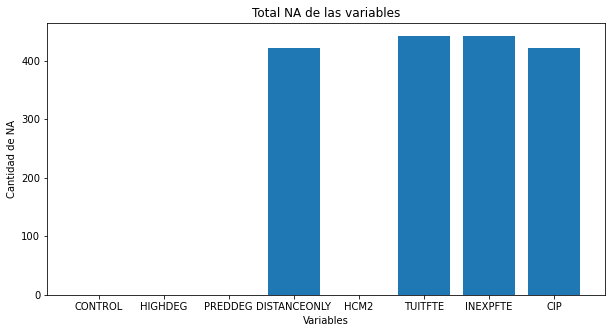

In [6]:
valores_faltantes=datos[variables].isna().sum()+(datos[variables]=='PrivacySuppressed').sum()
na_cip=datos[variables_cip].isna().any(axis=1)
valores_faltantes=valores_faltantes.append(pd.Series({"CIP":na_cip.sum() }))
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x=valores_faltantes.index,height=valores_faltantes)
plt.xlabel("Variables")
plt.ylabel("Cantidad de NA")
plt.title("Total NA de las variables")
plt.show()


De estas variables se tiene esta cantidad de NA e incluso las variables CIP se encuentra 

- variables_id: identificar a las universidades como ubicación, nombre, código id, pagina wen.
- variables_dum: Las identificamos como variables categoricas y en su mayoria tienen 2 niveles y no es necesario crear una dummy pues ya estan definias 0,1. Las variables CONTROL, HIGHDEG, PREDDEG se debe crear una dummy para cada una.
- variables_num: 5 variables, una de conteo, 2 de promedio y 2 de proporción.

Estandarizar (X-X_min)/(X_max-X_min) las numericas para una escata de 0 a 1 igual que las dummy.



- Celdas con 'PrivacySuppressed' hay datos que las universidades tienen como privado (los consideramos NA´s) , hay 7639 filas que tienen al menos una columna con información privada.
- Pero con las variables num y dum seleccionadas no se tiene ese problema.

# Datos creados:

- **datos**: Es el dataframe completo sin filtros.
- **datos_resultado**: Es el datafrrame con las variables id y las variables (numericas y dummy seleccionadas) sin registro de NA en las dummy y numerica y es el dataframe que se le añade la columna de cluster.
- **datos_estandar**: Es el datos_resultado con las variables numericas y dummy pero estandarizando las numericas de 0 a 1 y las categoricas a dummmy.
- **datos_pca**: Son los datos que se le aplicaron PCA a datos_estandar.


La idea es solo tener estos dataframe no es necesario crear mas.


In [7]:
datos_resultado=datos.loc[(~datos[[*variables_cip,*variables]].isna().any(axis=1)) & ((datos[['HIGHDEG', 'PREDDEG']]!=0).any(axis=1))
                          ,[*variables_id,*variables,*variables_cip] ].reset_index().drop(labels='index',axis=1)
print('De las ' ,datos.shape[0],' universidades se trabajara solo con ' ,
      datos_resultado.shape[0],' un ' ,round(datos_resultado.shape[0]/datos.shape[0]*100,2),
      '% de las univerisadad' )
datos_resultado['NUM_PROGRAM']=(datos_resultado[variables_cip]>0).sum(axis=1)
variables=[*variables,'NUM_PROGRAM']
variables_num=[*variables_num,'NUM_PROGRAM']

De las  7804  universidades se trabajara solo con  7279  un  93.27 % de las univerisadad


## Anilisis descriptivo

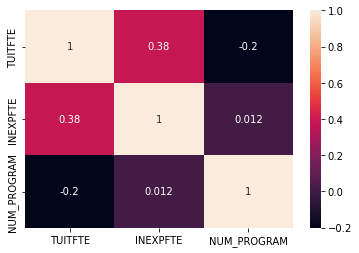

In [8]:
sns.heatmap(datos_resultado[variables_num].corr(), annot=True)
plt.show()

Las variables NUM_CERTDEGRE  y NUM_ASSOC estan alta mente correlacionadas llegando a un 0.72, y existen mas variables con correlación cerca de 0.35 esto sin tener en cuenta las variables cualitativas, por ende es recomendable realizar componentes principales.

# Segmentación

## Estandarización y creación de dummy.
- Para las variables numericas se estandariza para que se encuentren entre 0 y 1.
- Aunque las variables categoricas la mayoria ya tienen una estructura 0,1  hay 3 variables que son numericas pero con mas de 2 niveles.

- Los datos_estandar se encuentran estandarizados para aplicar una segmentación para todos.

In [9]:
datos_estandar=fn.estandarizacion(datos_resultado[variables],variables_num)
datos_estandar=fn.to_dummy(datos_estandar,['CONTROL', 'HIGHDEG', 'PREDDEG' ])
datos_estandar.describe()

,DISTANCEONLY,HCM2,TUITFTE,INEXPFTE,NUM_PROGRAM,CONTROL_1,CONTROL_2,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,PREDDEG_1,PREDDEG_2,PREDDEG_3
count,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000
mean,0.005083,0.008792,0.048038,0.022519,0.114539,0.273664,0.257178,0.355681,0.238769,0.123094,0.456244,0.210606,0.293035
std,0.071119,0.093361,0.040424,0.028550,0.144266,0.445869,0.437108,0.478752,0.426361,0.328567,0.498116,0.407767,0.455186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.021005,0.010730,0.012903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.042213,0.016933,0.051613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.064931,0.025550,0.161290,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Aplicación de PCA


Las 4 componentes explican un 87.15% de variabilidad de los datos esta función retorna las 4componentes


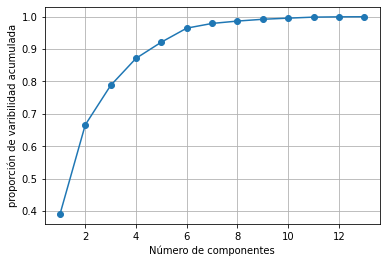

In [10]:
datos_pca=fn.datos_to_pca(datos_estandar,list(datos_estandar), 0.8)

- En este gráfico vemos que las 2 primeras componentes explican casi un 60% de variabilidad de las variables seleccionadas, 4 vairables explican casi un 80% de variabilidad de los datos. 

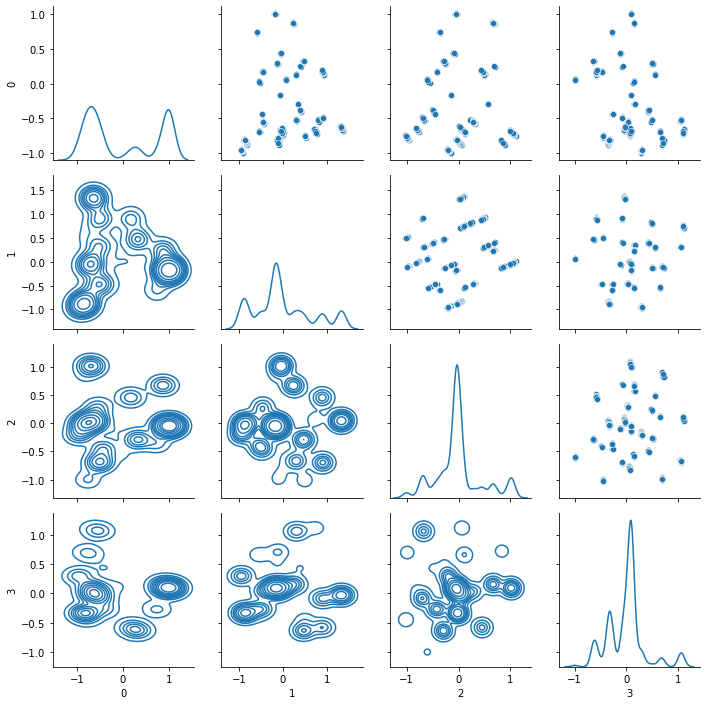

In [11]:
grafico_comparativo_num = sns.PairGrid(datos_pca )
grafico_comparativo_num.map_diag(sns.kdeplot)
grafico_comparativo_num.map_upper(sns.scatterplot)
grafico_comparativo_num.map_lower(sns.kdeplot)

In [12]:
# Historia=[]
sse=[]
score_kmeans=[]
score_spectral=[]
score_bir=[]
from tqdm import tqdm
num_cluster=10
for i in tqdm(range(2,num_cluster)):
    # k means
    Historia=sklearn.cluster.KMeans(n_clusters=i, random_state=42).fit(datos_pca)
    sse.append(Historia.inertia_) # sse kmeans
    score = sklearn.metrics.silhouette_score(datos_pca, Historia.labels_)
    score_kmeans.append(score)
    labels_temp=fn.spectral(datos_pca,list(datos_pca),i, 123 )
    score_spectral.append(sklearn.metrics.silhouette_score(datos_pca, labels_temp))
    bir_=sklearn.cluster.Birch(n_clusters=i).fit(datos_pca)
    labels_temp=bir_.labels_
    score_bir.append(sklearn.metrics.silhouette_score(datos_pca, labels_temp))    



100%|██████████| 8/8 [01:34<00:00, 11.85s/it]


[Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Score Birch')]

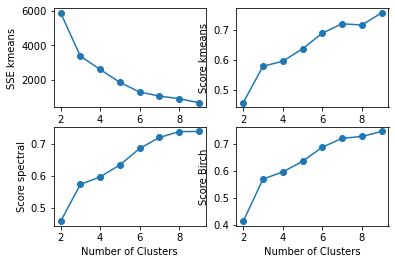

In [13]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(range(2,num_cluster ), sse,marker='o')
axs[0,0].set(xlabel="Number of Clusters",ylabel="SSE kmeans")
axs[0,1].plot(range(2, num_cluster), score_kmeans,marker='o')
axs[0,1].set(xlabel="Number of Clusters",ylabel="Score kmeans")
axs[1,0].plot(range(2, num_cluster), score_spectral,marker='o')
axs[1,0].set(xlabel="Number of Clusters",ylabel="Score spectral")
axs[1,1].plot(range(2, num_cluster), score_bir,marker='o')
axs[1,1].set(xlabel="Number of Clusters",ylabel="Score Birch")

Un número minimo de cluster apropiados para las universidades podria ser 4 ua que este presenta un sse pequeño y un socre serca del 0.6 lo que es alto y a medida que se añade mas numero de cluster este factor no presenta un cambio tan significativo.

In [14]:
cluster_0=fn.kmeans(datos_pca,list(datos_pca)[0:4], 4, 133 )
datos_pca['CLUSTER']=cluster_0
datos_pca['CLUSTER']='Cluster_'+(datos_pca['CLUSTER']+1).astype(str)
datos_resultado['CLUSTER']=datos_pca['CLUSTER']

<AxesSubplot:xlabel='0', ylabel='1'>

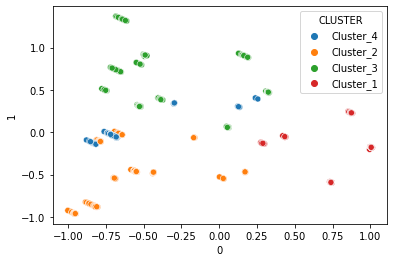

In [15]:
sns.scatterplot(x=0,y=1,data=datos_pca,hue='CLUSTER')

En este gráfico se observa en los graficos de dispersión una agrupación no muy clara y en los de densidad entre 2 variables nos muestra una posible agrupación mas clara, donde un grupo en especifico esta muy concentrado lo que sugiere un grupo de universidades que es muy frecuente.

## Tablas comparativas 

- En esta sección se realizara la descripción de los cluster creados para darle atributos y definir si tienen sentido o no.

- Los gráficos sera después de esto.

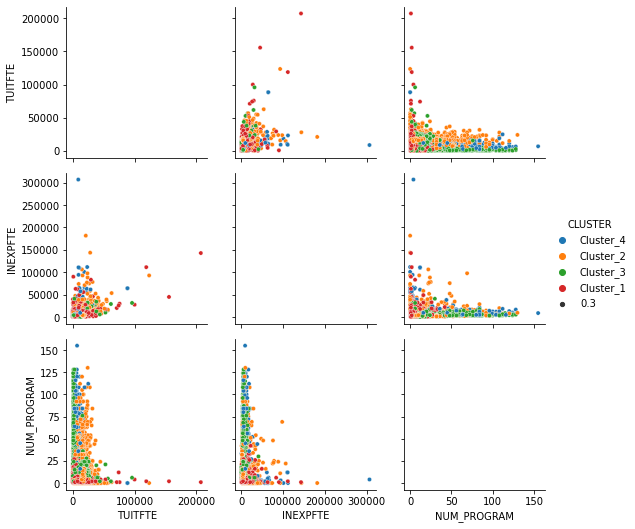

In [16]:
# datos_resultado['CLUSTER']= cluster_0
grafico_comparativo_num = sns.PairGrid(datos_resultado,vars =variables_num,hue='CLUSTER' )#,diag_sharey=False,diag_sharex=False)
# grafico_comparativo_num.map_diag(sns.kdeplot)#,kde=True,facet_kws=dict(sharey=False) )
grafico_comparativo_num.map_upper(sns.scatterplot,size=0.3)#,facet_kws=dict(sharey=False))
grafico_comparativo_num.map_lower(sns.scatterplot,size=0.3)#,facet_kws=dict(sharey=False))
grafico_comparativo_num.add_legend()

In [17]:
# Tablas comparativas para las vairables numericas seleccionadas
# datos_resultado['CLUSTER']= cluster_0
fn.tabla_dinamica(datos_resultado,'CLUSTER',variables_num,True , 2, False)

,,,,,,,,,,,,
0,,TUITFTE,,,,,,,,,,
1,CLUSTER,frec,min,Q1,Q2,Q3,max,atipico sup,atipico inf,media,sum,sd
2,Cluster_4,610,"527,0","5.011,75","6.551,5","9.273,0","88.466,0",28,0,"7.769,96","4.739.675,0","6.211,54"
3,Cluster_3,2.097,"0,0","1.948,0","5.171,0","12.239,0","95.815,0",17,0,"7.913,25","16.594.082,0","7.566,54"
4,Cluster_2,1.937,"0,0","10.047,0","13.956,0","18.300,0","123.492,0",66,0,"15.075,69","29.201.612,0","8.070,64"
5,Cluster_1,2.635,"0,0","4.498,0","7.631,0","10.476,5","207.213,0",102,0,"8.319,25","21.921.215,0","8.070,16"
6,Total,7.279,"0,0","4.352,5","8.747,0","13.454,5","207.213,0",197,0,"9.954,19","72.456.584,0","8.376,3"
7,----,----,----,----,----,----,----,----,----,----,----,----
8,,INEXPFTE,,,,,,,,,,
9,CLUSTER,frec,min,Q1,Q2,Q3,max,atipico sup,atipico inf,media,sum,sd


In [18]:
# Tablas comparativas para las vairables categoricas seleccionadas
# datos_resultado['CLUSTER']= cluster_0
fn.tabla_dinamica(datos_resultado,'CLUSTER',variables_dum,False , 2, False)

,-,-,-,-,-,-,-,-,-,-,-,-,-
0,-,-,-,-,-,-,-,-,-,-,-,-,-
1,Variables,CONTROL,,,,,,,,-,-,-,-
2,CLUSTER,3,Prop,2,Prop,1,Prop,Total,Prop,-,-,-,-
3,Cluster_4,0,"0,0%",0,"0,0%",610,"100,0%",610,"8,38%",-,-,-,-
4,Cluster_3,957,"45,64%",104,"4,96%",1.036,"49,4%",2.097,"28,81%",-,-,-,-
5,Cluster_2,329,"16,99%",1.608,"83,01%",0,"0,0%",1.937,"26,61%",-,-,-,-
6,Cluster_1,2.129,"80,8%",160,"6,07%",346,"13,13%",2.635,"36,2%",-,-,-,-
7,Total,3.415,"46,92%",1.872,"25,72%",1.992,"27,37%",7.279,"100,0%",-,-,-,-
8,-,-,-,-,-,-,-,-,-,-,-,-,-
9,Variables,HIGHDEG,,,,,,,,,,-,-


   <br><h2>¿Cómo son los cluster?  </h6>
    </br>
    <br>
    <b>Cluster 1 :</b>
En este grupo se encuentran 2635 instituciones educativas con un costo por matrícula cercano a 7.6mil dólares, y con una inversión por estudiante próxima a los 3.9mil dólares. En promedio estas instituciones educativas albergan 2 programas y la mayoría son privadas y con ánimo de lucro. Dentro de estas predominan las licenciaturas, que a su vez suelen ser el mayor nivel académico en estas institucions. 
</br>
<br>
<br> <b>Cluster 2:</b>
En este grupo se encuentran 1.937 instituciones educativas con un costo de matrícula cercano a 14 mil dólares, y con una inversión próxima a 7.3 miles de dólares. En promedio estas instituciones educativas albergan 15 programas, y la mayoría son privadas sin ánimo de lucro. Dentro de estas predominan las carreras profesionales, y su máximo nivel educativo son los posgrados. 
</br>
<br>
<b>Cluster 3:</b>
En este grupo se encuentran 2097 instituciones educativas con un costo por matrícula cercano a 5 mil dólares, y con una inversión próxima a 4.6 mil dólares. En promedio estas instituciones educativas albergan 20 programas académicos, y son públicas o privadas con ánimo de lucro. Dentro de estas predominan los grados asociados, que a su vez son el nivel educativo más alto.
</br>
<br>
<b>Cluster 4:</b>
En este grupo se encuentran 610 instituciones educativas con un costo por matrícula cercano a 6.5 mil dólares, y con una inversión próxima a 8 mil dólares. En promedio estas instituciones educativas albergan 27 programas académicos, y son públicas. Dentro de estas predominan las carreras profesional, y su nivel educativo más alto son los posgrados
</br>
<br> </br>



Fin .................

In [19]:
# titulacion=['Certificate degree', 'Associate degree', 'Bachelor´s degree', 'Graduate degree']
datos_resultado[['st_fips'] ]=datos_resultado[['st_fips'] ].replace(list(diccionario.iloc[27:85].VALUE.astype(int)), 
                                                                    list(diccionario.iloc[27:85].LABEL) )
datos_resultado[['CONTROL']]=datos_resultado[['CONTROL']].replace(list(diccionario.iloc[24:27].VALUE.astype(int)), 
                                                                  list(diccionario.iloc[24:27].LABEL))
datos_resultado[['PREDDEG']]=datos_resultado[['PREDDEG']].replace(list(diccionario.iloc[15:19].VALUE.astype(int)), 
                                                                  list(diccionario.iloc[15:19].LABEL))
datos_resultado[['HIGHDEG']]=datos_resultado[['HIGHDEG']].replace(list(diccionario.iloc[20:24].VALUE.astype(int)), 
                                                                  list(diccionario.iloc[20:24].LABEL))
datos_resultado[['RELAFFIL']]=datos_resultado[['RELAFFIL']].replace(list(diccionario.iloc[201:266].VALUE.astype(int)), 
                                                                  list(diccionario.iloc[201:266].LABEL))
datos_resultado[['DISTANCEONLY']]=datos_resultado[['DISTANCEONLY']].replace(list(diccionario.iloc[519:521].VALUE.astype(int)), 
                                                                  list(diccionario.iloc[519:521].LABEL))

In [20]:
filtro=~('www'==datos_resultado['INSTURL'].apply(lambda x: str(x)[0:3]) )
datos_resultado.loc[filtro,'INSTURL' ]='www.'+datos_resultado.loc[filtro,'INSTURL' ]
datos_resultado['INSTURL']=("<li class='dropdown'>  <a href='https://"+datos_resultado['INSTURL']+
                            "' target='_blank'>Main web page </a> </li>")

In [21]:
datos_resultado['RELAFFIL']=datos_resultado['RELAFFIL'].fillna('')
filtro=datos_resultado['RELAFFIL']!=''
datos_resultado.loc[filtro,'RELAFFIL']="<li class='dropdown'> Religion: "+datos_resultado.loc[filtro,'RELAFFIL'] +'</li>'

In [22]:
datos_resultado=datos_resultado.drop(labels=variables_cip, axis=1)

In [23]:
datos_resultado.to_csv('CollegeScorecard_result.csv', index=False)